**card**

In [191]:
#1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SelectKBest

In [39]:
# cargamos el data set y se muestra las primeras 5 filas 
data = pd.read_csv("car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [61]:

# Carga de datasets
data2 = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
data3 = pd.read_csv('Car details v3.csv')
data4 = pd.read_csv('car details v4.csv')

# Combinación de datasets
data_combinado = pd.concat([data1, data2, data3, data4], axis=0)

In [62]:
# Análisis general del dataset combinado
print(data_combinado.info())


<class 'pandas.core.frame.DataFrame'>
Index: 14828 entries, 0 to 2058
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car_Name            301 non-null    object 
 1   Year                2360 non-null   float64
 2   Selling_Price       301 non-null    float64
 3   Present_Price       301 non-null    float64
 4   Kms_Driven          301 non-null    float64
 5   Fuel_Type           301 non-null    object 
 6   Seller_Type         301 non-null    object 
 7   Transmission        2360 non-null   object 
 8   Owner               2360 non-null   object 
 9   name                12468 non-null  object 
 10  year                12468 non-null  float64
 11  selling_price       12468 non-null  float64
 12  km_driven           12468 non-null  float64
 13  fuel                12468 non-null  object 
 14  seller_type         12468 non-null  object 
 15  transmission        12468 non-null  object 
 16  owner     

In [63]:
# Análisis de tipos de datos
print(data_combinado.dtypes)

Car_Name               object
Year                  float64
Selling_Price         float64
Present_Price         float64
Kms_Driven            float64
Fuel_Type              object
Seller_Type            object
Transmission           object
Owner                  object
name                   object
year                  float64
selling_price         float64
km_driven             float64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage                object
engine                 object
max_power              object
torque                 object
seats                 float64
Make                   object
Model                  object
Price                 float64
Kilometer             float64
Fuel Type              object
Location               object
Color                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain

In [64]:
# Análisis de valores faltantes
print(data_combinado.isnull().sum())

Car_Name              14527
Year                  12468
Selling_Price         14527
Present_Price         14527
Kms_Driven            14527
Fuel_Type             14527
Seller_Type           14527
Transmission          12468
Owner                 12468
name                   2360
year                   2360
selling_price          2360
km_driven              2360
fuel                   2360
seller_type            2360
transmission           2360
owner                  2360
mileage                6921
engine                 6921
max_power              6915
torque                 6922
seats                  6921
Make                  12769
Model                 12769
Price                 12769
Kilometer             12769
Fuel Type             12769
Location              12769
Color                 12769
Seller Type           12769
Engine                12849
Max Power             12849
Max Torque            12849
Drivetrain            12905
Length                12833
Width               

In [65]:
# Análisis descriptivo de variables numéricas
print(data_combinado.describe())


              Year  Selling_Price  Present_Price     Kms_Driven          year  \
count  2360.000000     301.000000     301.000000     301.000000  12468.000000   
mean   2016.068644       4.661296       7.628472   36947.205980   2013.555743   
std       3.435772       5.082812       8.644115   38886.883882      4.118485   
min    1988.000000       0.100000       0.320000     500.000000   1983.000000   
25%    2014.000000       0.900000       1.200000   15000.000000   2011.000000   
50%    2016.000000       3.600000       6.400000   32000.000000   2014.000000   
75%    2018.000000       6.000000       9.900000   48767.000000   2017.000000   
max    2022.000000      35.000000      92.600000  500000.000000   2020.000000   

       selling_price     km_driven        seats         Price     Kilometer  \
count   1.246800e+04  1.246800e+04  7907.000000  2.059000e+03  2.059000e+03   
mean    5.915773e+05  6.856508e+04     5.416719  1.702992e+06  5.422471e+04   
std     7.377876e+05  5.333721e+0

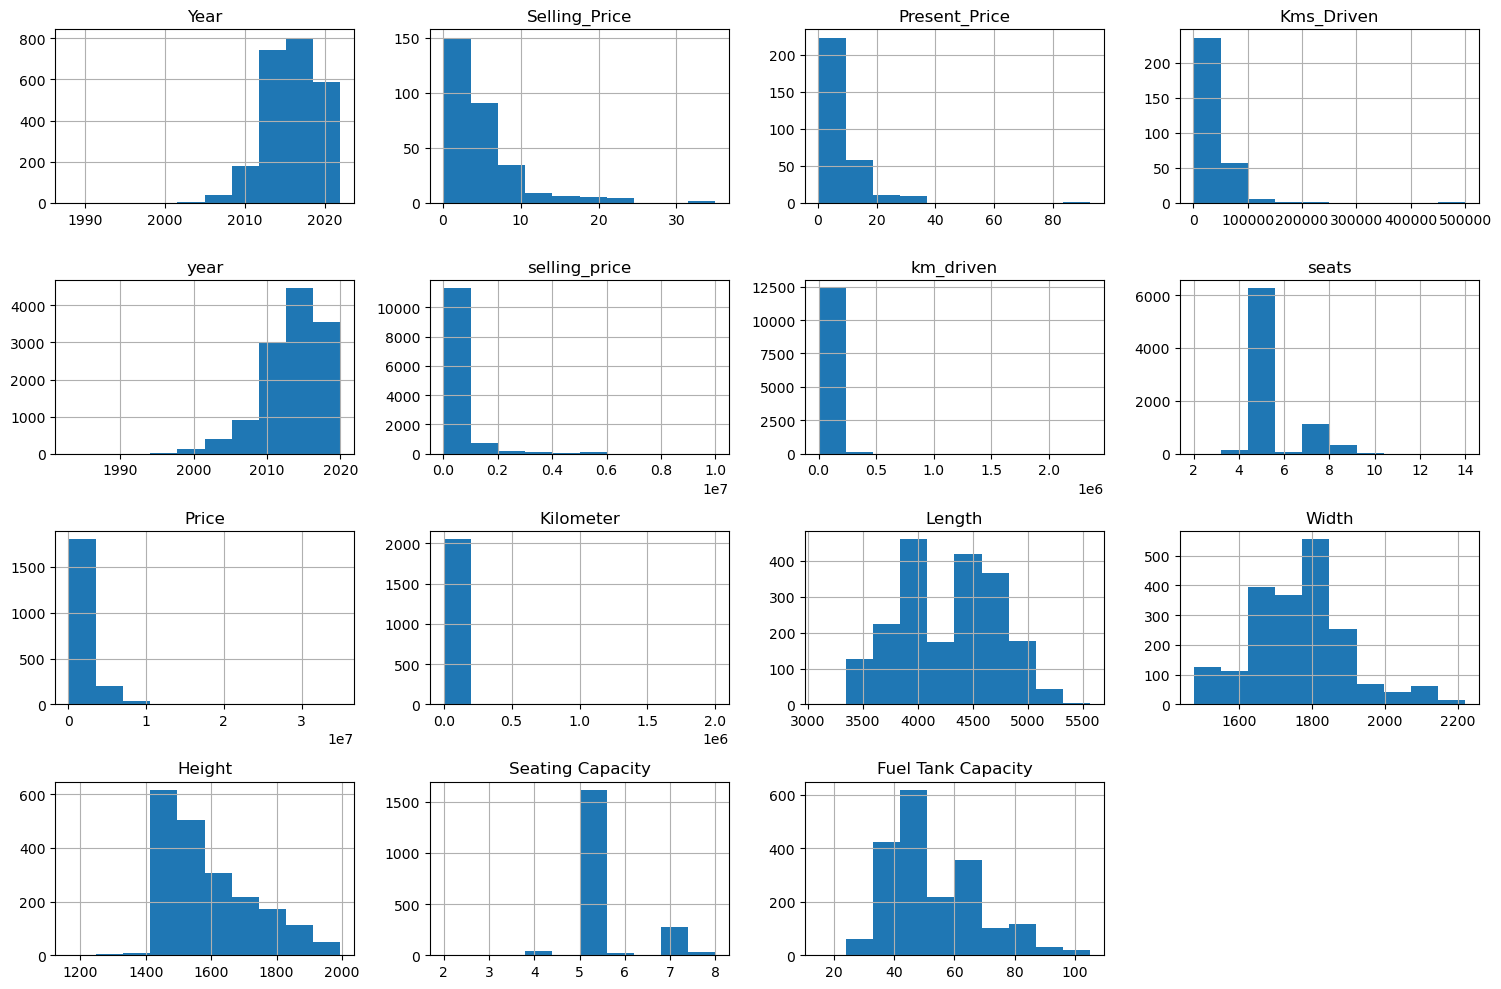

In [66]:
# Distribución de variables numéricas
data_combinado.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

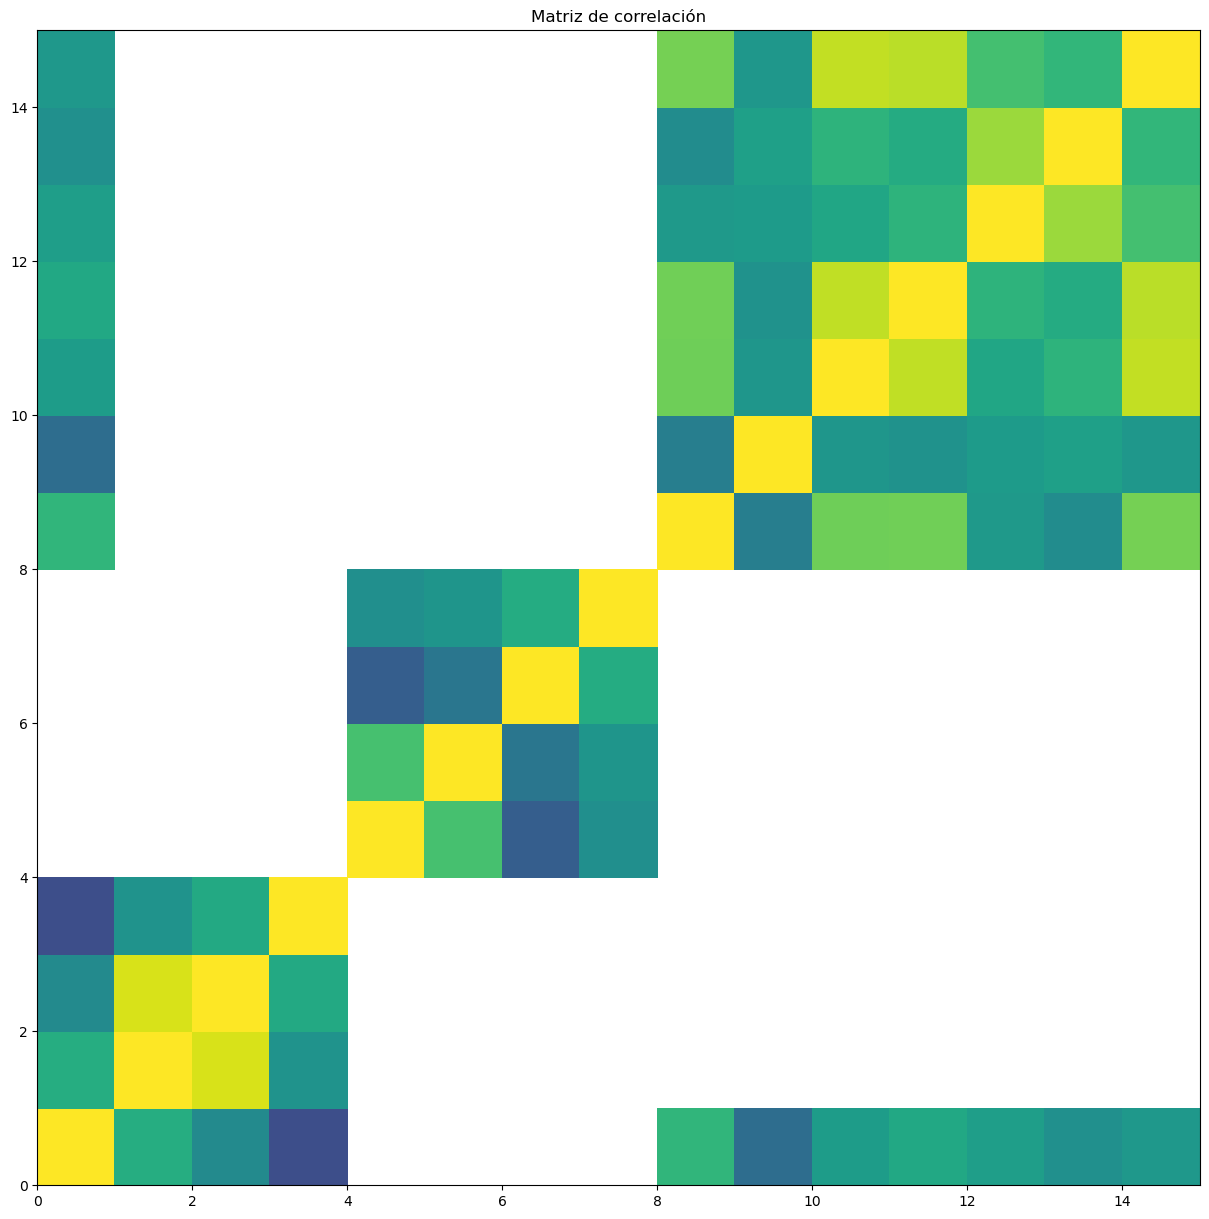

In [76]:
# Filtrar solo columnas numéricas
data_numerica = data_combinado.select_dtypes(include='number')

# Análisis de correlación entre variables numéricas
correlation_matrix = data_numerica.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('Matriz de correlación')
ax.pcolor(correlation_matrix, vmin=-1, vmax=1)
plt.show()


Análisis de Car_Name:
Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64


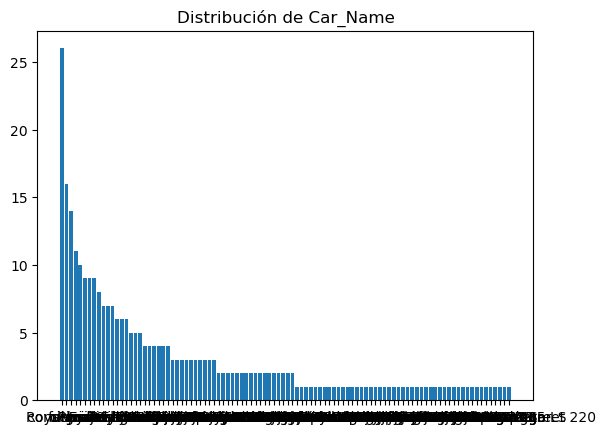

In [80]:
# Filtrar solo columnas categóricas
data_categorica = data_combinado.select_dtypes(include='object')

# Análisis de relaciones entre variables categóricas
# (Considera la variable categórica que deseas analizar)
variable_categorica = 'Car_Name'  # Cambiar por la columna que desees analizar
print(f"Análisis de {variable_categorica}:")
print(data_categorica[variable_categorica].value_counts())
plt.bar(data_categorica[variable_categorica].value_counts().index, data_categorica[variable_categorica].value_counts().values)
plt.title(f"Distribución de {variable_categorica}")
plt.show()


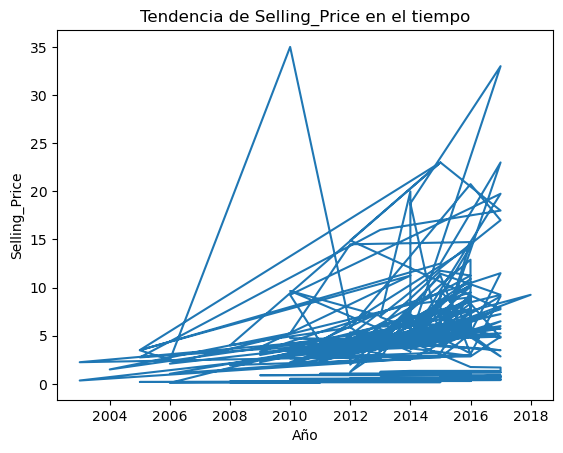

In [93]:
# Análisis de tendencias en variables numéricas
# (Considera la variable numérica y la variable de fecha que deseas analizar)
variable_fecha = 'Year'  # Cambiar por la columna de fecha
variable_numerica = 'Selling_Price'  # Cambiar por la variable numérica que deseas analizar

plt.plot(data_combinado[variable_fecha], data_combinado[variable_numerica])
plt.title(f"Tendencia de {variable_numerica} en el tiempo")
plt.xlabel("Año")
plt.ylabel(variable_numerica)
plt.show()


In [95]:
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 
# Tratar valores faltantes
from sklearn.impute import SimpleImputer

In [241]:
# Imputar valores faltantes en variables numéricas con la media
imputer = SimpleImputer(strategy='mean')
data_numeric = data_combinado.select_dtypes(include=['int', 'float'])
data_numeric_imputed = pd.DataFrame(imputer.fit_transform(data_numeric), columns=data_numeric.columns)

In [246]:
# Manejar valores atípicos en la columna 'Present_Price' (ejemplo)
valor_min = 0  # Define el valor mínimo aceptable
valor_max = 100000  # Define el valor máximo aceptable
data = data[(data['Present_Price'] > valor_min) & (data['Present_Price'] < valor_max)]


In [252]:
# Manejar datos duplicados
data = data.drop_duplicates()

In [254]:
#3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [16]:
columnas = data.columns.tolist()

# Imprimir la lista de columnas
print("Columnas del conjunto de datos:")
print(columnas)

Columnas del conjunto de datos:
['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']


In [37]:
# Lista de columnas del conjunto de datos
columnas = ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']

# Identificar las variables objetivo
variables_objetivo = ['Car_Name', 'Year']  # Agrega aquí los nombres de tus variables objetivo

# Imprimir las variables objetivo encontradas en la lista de columnas
print("Variables objetivo:")
for columna in columnas:
    if columna in variables_objetivo:
        print(columna)


Variables objetivo:
Car_Name
Year


In [38]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

data1 = pd.read_csv("car data.csv")
data2 = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
data3 = pd.read_csv('Car details v3.csv')
data4 = pd.read_csv('car details v4.csv')

# Escoge uno de los conjuntos de datos cargados
data = data1  # o data2, data3, data4

# Codificar las variables categóricas utilizando one-hot encoding
X = pd.get_dummies(data[['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission']])

# Definir la variable objetivo (y)
y = data['Selling_Price']

# Crear un estimador (por ejemplo, RandomForestRegressor)
estimator = RandomForestRegressor()

# Crear un selector RFE con el estimador y el número deseado de características
selector = RFE(estimator, n_features_to_select=3, step=1)

# Ajustar el selector a los datos
selector = selector.fit(X, y)

# Obtener las características seleccionadas
selected_features = X.columns[selector.support_]

# Imprimir las características seleccionadas
print("Características seleccionadas:")
print(selected_features)


Características seleccionadas:
Index(['Present_Price', 'Kms_Driven', 'Fuel_Type_Diesel'], dtype='object')


In [39]:
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [40]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# La variable X_train contendrá las características del conjunto de entrenamiento
# La variable y_train contendrá las etiquetas correspondientes del conjunto de entrenamiento
# La variable X_test contendrá las características del conjunto de prueba
# La variable y_test contendrá las etiquetas correspondientes del conjunto de prueba

# Ahora puedes utilizar X_train y y_train para entrenar tu modelo, y X_test y y_test para evaluarlo.


In [42]:
#5. Entrenar el modelo configurando los diferentes hiperparámetros

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Crear una instancia del modelo RandomForestRegressor
modelo = RandomForestRegressor()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Una vez que el modelo está entrenado, puedes utilizarlo para hacer predicciones
# por ejemplo, puedes usar X_test para hacer predicciones y luego compararlas con y_test para evaluar el rendimiento del modelo


RandomForestRegressor()

In [44]:
modelo = RandomForestRegressor(n_estimators=100, max_depth=5)


In [46]:
#6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir y entrenar el modelo
modelo = RandomForestRegressor()
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Squared Error: 1.9812983874521868
Mean Absolute Error: 0.9048019125683064


In [51]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

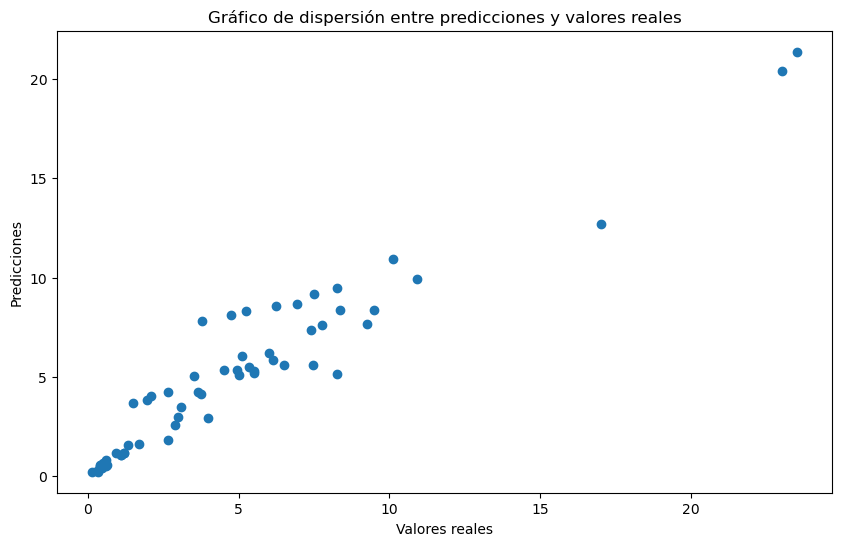

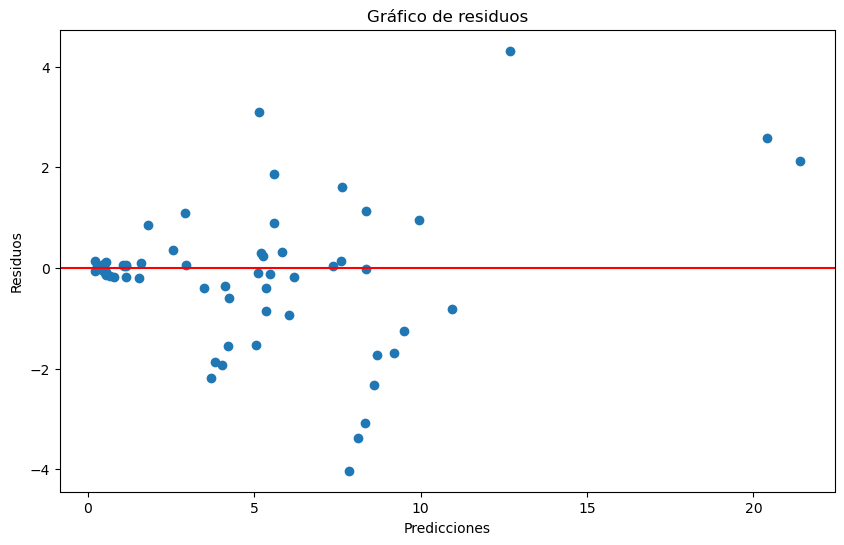

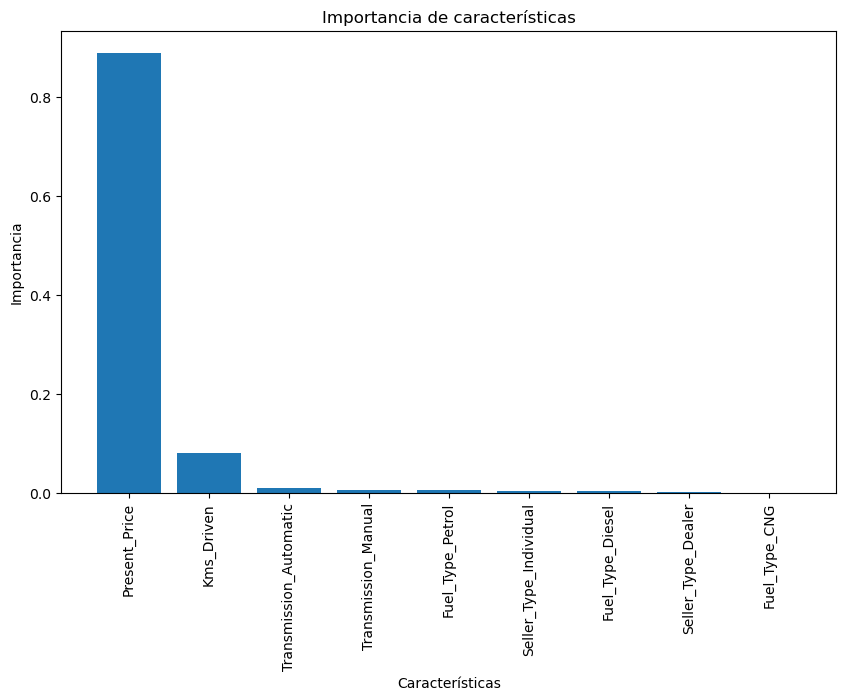

In [53]:
import matplotlib.pyplot as plt
import numpy as np


# Gráfico de dispersión entre predicciones y valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de dispersión entre predicciones y valores reales")
plt.show()

# Gráfico de residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Gráfico de residuos")
plt.show()

# Gráfico de importancia de características
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de características")
plt.show()


In [54]:
# Interpretación del gráfico de dispersión entre predicciones y valores reales El gráfico de dispersión
#muestra la relación entre las predicciones hechas por un modelo y los valores reales observados. Cada punto en el gráfico 
#representa una observación individual, con el valor predicho en el eje y y el valor real en el eje x. Análisis del gráfico 
#En este gráfico, podemos observar que las predicciones son generalmente más altas que los valores reales. Esto significa que el
#modelo tiende a sobreestimar los valores reales. Esto puede deberse a varios factores



#Interpretación del gráfico de dispersión entre predicciones y valores residuales
#El gráfico de dispersión muestra la relación entre las predicciones hechas por un 
#modelo y los valores residuales. Cada punto en el gráfico representa una observación individual,
#con el valor residual en el eje y y el valor predicho en el eje x.


#Análisis del gráfico

#En este gráfico, podemos observar que no hay una relación clara entre las predicciones y los valores residuales.
#Esto significa que los valores residuales no están correlacionados con las predicciones. Esto es una buena señal, 
#ya que indica que el modelo no está sobreestimando ni subestimando los valores reales para valores de predicción altos o bajos.
#También podemos observar que la mayoría de los puntos están distribuidos aleatoriamente alrededor de la línea de 
#tendencia, lo que indica que no hay patrones en los errores del modelo. Esto también es una buena señal, ya que significa
#que el modelo es capaz de capturar la complejidad de la relación entre las variables.





#Interpretación del gráfico de importancia de características

#El gráfico de importancia de características muestra la importancia
#relativa de cada característica para predecir el precio de un automóvil usado. 
#La importancia de una característica se mide por la ganancia de información que
#aporta al modelo. Cuanto mayor sea la ganancia de información, más importante es la característica.

    
#Análisis del gráfico

#En este gráfico, podemos observar que la característica más importante es Present_Price.
#Esto significa que el precio actual del automóvil es el factor más importante que determina 
#el precio de venta. Esto es lógico, ya que el precio actual refleja el estado del automóvil y su demanda en el mercado.
#Las siguientes características más importantes son Kms_Driven, Transmission_Automatic, 
#Transmission_Manual, Fuel_Type_Petrol y Seller_Type_Individual. Esto significa que estos 
#factores también tienen un impacto significativo en el precio de venta del automóvil.
#Las características menos importantes son Fuel_Type_Diesel y Seller_Type_Dealer. Esto 
#significa que estos factores tienen un impacto menor en el precio de venta del automóvil.